In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [4]:
ve1 = np.zeros(shape=(1,3,5))
b1 = np.array([[1,2,3,4,5],[1,2,3,44,5],[1,3,3,4,4]])

b1 = b1.reshape(1,3,5)
b1 = np.append(b1, np.array([[1,2,3,4,5],[1,2,3,4,5],[1,3,3,4,4]]).reshape(1,3,5),axis=0)
b1 = np.delete(b1,0)
print(b1)


#ve1 = np.append(ve1,b1,axis=0)


[ 2  3  4  5  1  2  3 44  5  1  3  3  4  4  1  2  3  4  5  1  2  3  4  5
  1  3  3  4  4]


In [5]:
def pos(x,y):
    return np.array([x,y])
print(-4.713579828527527E+07)

-47135798.28527527


In [6]:
anga = np.array([])
np.append(anga,3)

print(anga)

[]


In [7]:
def accn(n,G,rs2,r,mass):
    ff = np.zeros(shape=(3,n))
    #epot = np.zeros(shape=(2,n))
    
    for i in range(n-1):
        for j in range(i+1,n):
            diff = r[:,j] - r[:,i]
            dr1 = np.sqrt(np.dot(diff,diff) + rs2)
            dr2 = np.power(dr1,3.0)
            #if i==2 or j==2:
            #    dr1 = np.sqrt(np.dot(diff,diff) + 0.00)
            #    dr2 = np.power(dr1,3.0)
            ff[:,i] = ff[:,i] + (G*mass[:,j]*diff)/dr2
            ff[:,j] = ff[:,j] - (G*mass[:,i]*diff)/dr2
       
            
            
    for i in range(n):
        
        ff[:,i] = ff[:,i]
    
    return ff[0,:], ff[1,:], ff[2,:]

In [99]:
def leap_kdk(n,G,tm,dt,rs2):
    mass = np.zeros(shape=(1,n))
    r = np.zeros(shape=(3,n))
    v = np.zeros(shape=(3,n))
    
    f = np.zeros(shape=(3,n))
    
    ang = np.zeros(shape=(1,n))
    #anga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))
    anga = np.zeros(shape=(1,1,n))
    
    rmag = np.zeros(shape=(1,n))
    #rmaga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))
    rmaga = np.zeros(shape=(1,1,n))

    vmag = np.zeros(shape=(1,n))
    #vmaga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))
    vmaga = np.zeros(shape=(1,1,n))

    #rl = np.zeros(shape=(len(np.arange(0,tm,dt)),3,n))
    rl = np.zeros(shape=(1,3,n))
    #vl = np.zeros(shape=(len(np.arange(0,tm,dt)),3,n))
    vl = np.zeros(shape=(1,3,n))
    time=[]
    
   
    #Sun-Earth
    mass[:,:] = [1,0.001,0]
    #mass[:,:] = [1,1,0]
    r[:,:] = [[0,1,1],[0,0,0],[0,0,0]]
    vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    v[:,:] = [[0,0,0],[0,vc,1*vc],[0,0,0]]
  
    posp = [-0.09,0.09,0.0]
    velp = [0.0,-0.0,0]
    
    r[:,2] = r[:,2] + posp
    v[:,2] = v[:,2] + velp
    
    
     #mass[:,:] = [1,0.001,0]
    #r[:,:] = [[0,1,-1],[0,0,0],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,0],[0,vc,-vc],[0,0,0]]
    
    #or
    
    #posp = [0.0,0.0,0]
    #velp = [0.1,-0.1,0]
    
    #r[:,2] = r[:,2] + posp
    #v[:,2] = v[:,2] + velp 

    #velp = [0.09,-0.09,0]
    
 
    
    
    #Earth-Moon-Sat
    #r[:,:] = [[ 0,  384400,0],[\
    #           0,0,0],[ 0,  0,0]]
    #mass[:,:] = [5.97219e24,7.349e22,0]
    #v[:,:] = [[0,0,0],[0,\
    #          np.sqrt(6.67e-11*mass[:,0]/np.power(np.linalg.norm([384400000,0]),1.0) )/1000,\
    #                   0],[0,   0,0]]
   
    #rad_pl = 387500
    #sat_v0 = 0
    #sat_vz = 0
    #r[:,2] =  ((rad_pl*np.array([1,0,0]))/(np.linalg.norm(np.array([1,0,0]))))
    #v[:,2] =  ((sat_v0*np.array([0,1,0]))/(np.linalg.norm(np.array([0,1,0])))) + [0.0,0.0,sat_vz]
    #sat_v =0.5
    #v[:,2] = ((sat_v0*np.array([1,0,0]))/(np.linalg.norm(np.array([1,0,0])))) + ((sat_v*np.array([0,1,0]))/(np.linalg.norm(np.array([0,1,0])))) 
        
    #ejection: vo = -13.5, vz = -1.44
    #sun assist swingby: v = -21.0 v0 = 10
    #moon swingby vo = -12.0 vz= -1.44
    #final swingby v0 = 4.1, vz =0, 6371+36000, v in y, r in x (200-300 days)
    #final swingby 2 v0 =5.1(x), v=9.84(y), 6371, r in x (100 days)

    #final ejection  v0 =5.1(x), v=9.96(y), 6371, r in x (10 days) 
    #mass[:,2] = 1000

    
    #r = r*6.6846e-9
    #v = v*0.210805
    #mass =mass/1.988544e30
  
    mtot=0
    pos0=np.zeros(shape=(1,3))
    vel0=np.zeros(shape=(1,3))
    
    for i in range(n):
        pos0 = pos0 + r[:,i]*mass[:,i]
        
        vel0 = vel0 + v[:,i]*mass[:,i]
        mtot = mtot + mass[:,i]
    
    pos0 = pos0/mtot
    vel0 = vel0/mtot
  
    

    for i in range(n):
        
        r[:,i] = r[:,i] - pos0
        v[:,i] = v[:,i] - vel0

    j=0
   
    accs = accn(n,G,rs2,r,mass)
    
    time.append(j)
    f[0,:] = accs[0]
    f[1,:] = accs[1]
    f[2,:] = accs[2]
   
  
   

    dt0 = dt
    #dt0 = dt*10000
    count = 0
    #for j in np.arange(0,tm,dt):
    
    
    while j < tm:
        accmax=0
        for i in range(n):
            accmax = np.maximum(accmax,np.dot(f[:,i],f[:,i]))
            
        #dt=dt0/np.sqrt(accmax)
        dt = dt0
        j = j+dt
        for i in range(n):
            
            
            
            v[:,i] +=   dt*(f[:,i])*0.5
            
            r[:,i] += (v[:,i])*dt
       
        accs = accn(n,G,rs2,r,mass)
        f[0,:] = accs[0]
        f[1,:] = accs[1]
        f[2,:] = accs[2]
        
        
        for i in range(n):  
            
            v[:,i] +=   dt*(f[:,i])*0.5
        

            ang[:,i] = 2*np.linalg.norm(np.cross(r[:,i],v[:,i])/2)
            
            rmag[:,i] = np.linalg.norm(r[:,i])
            vmag[:,i] = np.dot(r[:,i],v[:,i])/rmag[:,i]
        
        ang = ang.reshape((1,1,n))
        anga = np.append(anga,ang,axis=0)
       
        
        
        rmag = rmag.reshape((1,1,n))  
        rmaga = np.append(rmaga,rmag,axis=0)
            
            
            #if count>3 and vmag<vmaga[count-1,:,i]:
            #    vmag =- vmag
            
            #elif r[0,i]<0 and r[1,i]>0:
        
        #    vmag = -vmag
        vmag = vmag.reshape((1,1,n))  
        vmaga = np.append(vmaga,vmag,axis=0)
        
        r = r.reshape((1,3,n)) 
        v = v.reshape((1,3,n)) 
        rl = np.append(rl,r,axis=0)
        vl = np.append(vl,v,axis=0)
       
            #pot[count,:,i] =-G*Ms/np.power(  np.sqrt(np.dot(r[:,i],r[:,i]) + rs2) ,1.0)
        r = r.reshape((3,n)) 
        v = v.reshape((3,n)) 
        vmag = vmag.reshape((1,n))
        rmag = rmag.reshape((1,n))
        ang = ang.reshape((1,n))
        #eng = (Me*np.dot(v,v)/2) - G*Me*Ms/(np.linalg.norm(r))
        #rx.append(r[0])
        #ry.append(r[1])
        time.append(j)
        #energy.append(eng)
        count += 1
        


    time = np.array(time)
    #energy = np.array(energy)/10e33

    return rl,vl,rmaga,vmaga,anga,time


In [112]:
nbody = leap_kdk(3,39.441,4000*24*60*60/3.154e7,1*24*60*60/3.154e7,0.0)


In [113]:
rev = nbody[0]
vmags = nbody[3]
rmags = nbody[2]
time = nbody[5]

In [114]:
print(len(time),len(rev))

4002 4002


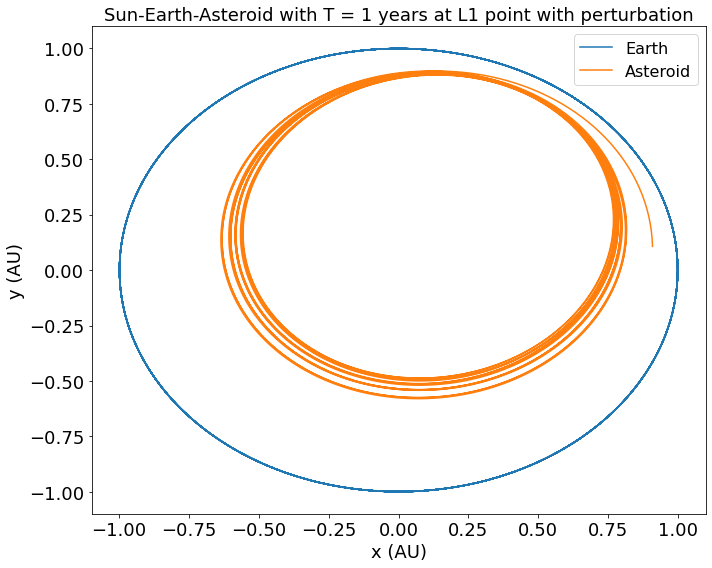

In [115]:
XX1=[]
XX2=[]
YY1=[]
YY2=[]
XX3=[]
YY3=[]

for counts in range(0,len(rev)):
    x = rev[counts,0][0]
    y = rev[counts,1][0]
    XX1.append(x)
    YY1.append(y)
    x = rev[counts,0][1]
    y = rev[counts,1][1]
    XX2.append(x)
    YY2.append(y)
    x = rev[counts,0][2]
    y = rev[counts,1][2]
    XX3.append(x)
    YY3.append(y)
plt.figure(figsize=(10,8))
plt.plot(XX2[1:],YY2[1:],label="Earth")
plt.plot(XX3[1:],YY3[1:],label="Asteroid")
plt.title('Sun-Earth-Asteroid with T = 1 years at L1 point with perturbation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('x (AU)',fontsize=18)
plt.ylabel('y (AU)',fontsize=18)
plt.legend(fontsize=16,loc='upper right')
plt.tight_layout()
plt.savefig('sun-earth-asteroid-l1-pert.png')
plt.show()

#plt.xlim(-0.003,-0.002)
#plt.ylim(-0.001,0.001)
#plt.xlim(-0.003,-0.002)
#plt.ylim(-0.001,0.001)
#plt.xlim(-0.003,0.003)
#plt.ylim(-0.0005,0.005)

In [116]:
Omega = 2*np.pi # fiddle with these to keep Earth and Moon in frame 6.3
phase = 0 #np.pi/3 #1.8
X3=[]
Y3=[]
X2=[]
Y2=[]
time = nbody[5]

for counts in range(0,len(rev)):
    x = rev[counts,0][1]
    y = rev[counts,1][1]
    t = time[counts]
   
    rottx =  x*np.cos(Omega*t+phase)+y*np.sin(Omega*t+phase)
    rotty = -1*x*np.sin(Omega*t+phase)+y*np.cos(Omega*t+phase)
    X2.append(rottx)
    Y2.append(rotty)
    x = rev[counts,0][2]
    y = rev[counts,1][2]
    
    rottx =  x*np.cos(Omega*t+phase)+y*np.sin(Omega*t+phase)
    rotty = -1*x*np.sin(Omega*t+phase)+y*np.cos(Omega*t+phase)
    X3.append(rottx)
    Y3.append(rotty)


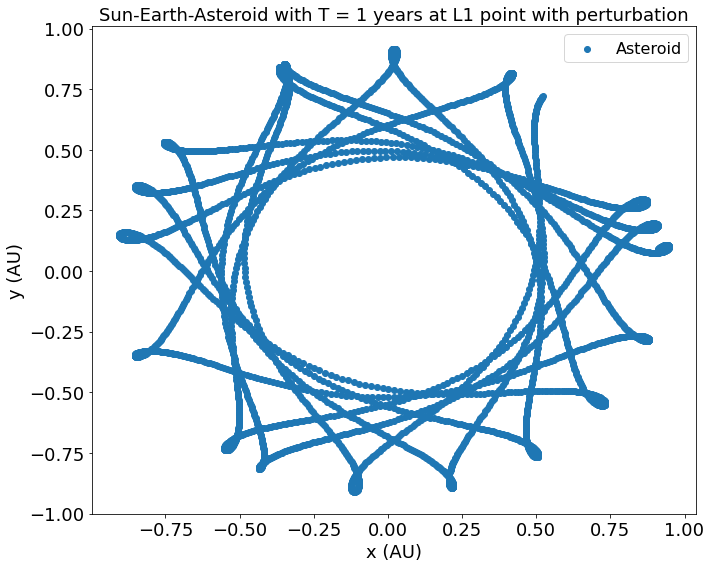

In [117]:
plt.figure(figsize=(10,8))
#plt.scatter(X2[1:],Y2[1:],label="Earth")
plt.scatter(X3[1:],Y3[1:],label="Asteroid")
plt.title('Sun-Earth-Asteroid with T = 1 years at L1 point with perturbation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('x (AU)',fontsize=18)
plt.ylabel('y (AU)',fontsize=18)
plt.legend(fontsize=16,loc='upper right')
plt.tight_layout()
plt.savefig('sun-earth-asteroid-l1-rot-pert.png')
plt.show()
#plt.scatter(X2[1:],Y2[1:],s=1)
#plt.scatter(X3,Y3,s=1)
#plt.plot(XX2,YY2)

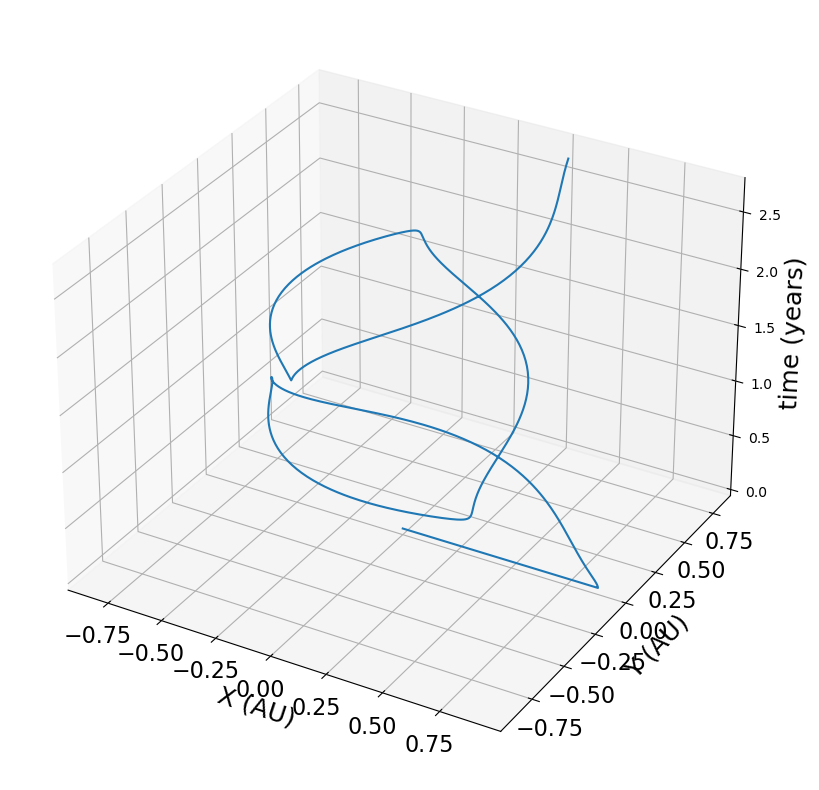

In [114]:
fig = plt.figure(figsize=(10,8),dpi=100)
ax = plt.axes(projection='3d')

ax.plot3D(X3, Y3, time)

ax.set_xlabel('X (AU)',fontsize=18)
ax.set_ylabel('Y (AU)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_zlabel('time (years)',fontsize=18)
plt.tight_layout()
plt.savefig('3d.png')

In [ ]:
plt.figure(figsize=(10,8),dpi=100)    
plt.plot(X1,Y1,color='black',label='Sun')
plt.plot(X2,Y2,color='orange',label='Earth')
plt.plot(X4,Y4,label='Satellite')
plt.plot(X3,Y3,color='blue',label='Moon')
#plt.xlim(1-0.04,1+0.04)
#plt.ylim(-0.05,0.05)
plt.title('Sun-Earth-Satellite with T = 1.5 years (Swing-by Sun)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('x (AU)',fontsize=18)
plt.ylabel('y (AU)',fontsize=18)
plt.legend(fontsize=16,loc='upper right')
plt.savefig('sun-earth-moon-sat.png')
plt.show()


In [ ]:
# parameters

#(1) L4/L5 short horsehoe: 
    #mass[:,:] = [1,0.001,0]
    #r[:,:] = [[0,1,0.5],[0,0,np.sin(np.pi/3)],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,-vc*np.sin(np.pi/3)],[0,vc,vc/2],[0,0,0]]
  
    #posp = [0,0,0]
    #velp = [0.09,-0.09,0]
    
    #r[:,2] = r[:,2] + posp
    #v[:,2] = v[:,2] + velp
    
    #show for Jupiter and asteroid in rotational and cartesian
    
#(2) L3 long horsehoe:
    #mass[:,:] = [1,0.001,0]
    #r[:,:] = [[0,1,-1],[0,0,0],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,0],[0,vc,-vc],[0,0,0]]
    
    #or
    
    #posp = [0.0,0.0,0]
    #velp = [0.1,-0.1,0]
    
    #r[:,2] = r[:,2] + posp
    #v[:,2] = v[:,2] + velp 
    
    #3d time 
    
#(3) L2/L1 orbit:
    #mass[:,:] = [1,0.001,0]
    #r[:,:] = [[0,1,-1],[0,0,0],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,0],[0,vc,-vc],[0,0,0]]

    
    #Sun-Earth
    #mass[:,:] = [1,0.001,0]
    #mass[:,:] = [1,1,0]
    #r[:,:] = [[0,1,1],[0,0,0],[0,0,0]]
    #vc = np.sqrt(G*(mass[:,0]+mass[:,1])/np.power(np.linalg.norm([1,0]),1.0) )
    #v[:,:] = [[0,0,0],[0,vc,1*vc],[0,0,0]]
  
    #posp = [-0.05,0.05,0.0]
    #velp = [0.0,-0.0,0]
    
    #r[:,2] = r[:,2] + posp
    #v[:,2] = v[:,2] + velp
    
    #time = 360 days
    